___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('loan_data.csv')

In [6]:
df.describe()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


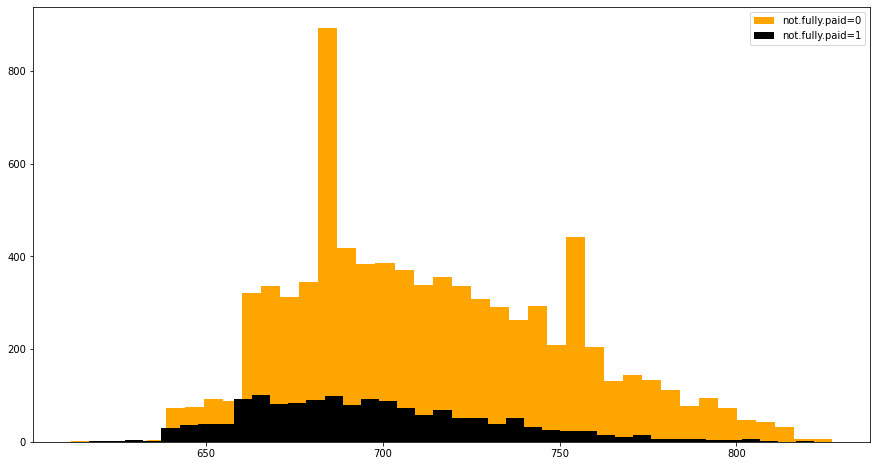

In [7]:
fico_data = df[['fico','not.fully.paid']]
x1 = fico_data[fico_data['not.fully.paid'] == 1]
x2 = fico_data[fico_data['not.fully.paid'] == 0]

fig, ax = plt.subplots(figsize=(15,8))

plt.hist(x2['fico'], color='orange', bins=40,label='not.fully.paid=0')
plt.hist(x1['fico'], color='black', bins=40, label='not.fully.paid=1')

ax.legend(loc='best')
plt.show()


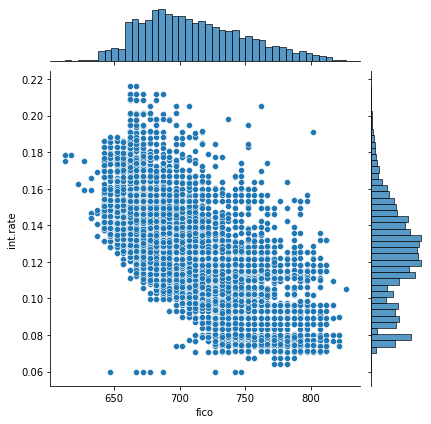

In [8]:
sns.jointplot(data=df[['fico','int.rate']], x="fico", y="int.rate")

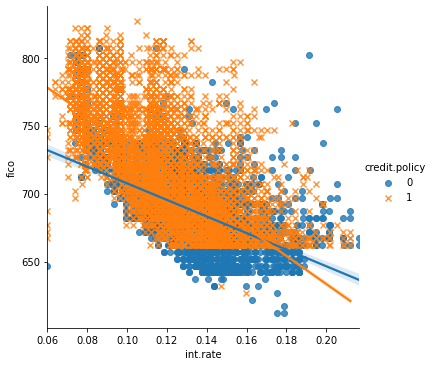

In [9]:
import seaborn as sns
g = sns.lmplot(x="int.rate", y="fico", data=df, hue="credit.policy", markers=["o", "x"])

In [10]:
df1=pd.get_dummies(df["purpose"])
del df["purpose"]

df = pd.concat([df, df1],axis=1, join="inner")
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

y = df["credit.policy"]
X = df.drop('credit.policy',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [13]:
logmodel.score(X_train,y_train)

0.8962411902897416

In [14]:
logmodel.score(X_test,y_test)

0.8966597077244259

In [15]:
y_predictions = logmodel.predict(X_test)

In [16]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_predictions)

0.8966597077244259

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.89      0.57      0.70       397
           1       0.90      0.98      0.94      1519

    accuracy                           0.90      1916
   macro avg       0.89      0.78      0.82      1916
weighted avg       0.90      0.90      0.89      1916



In [18]:
m1=confusion_matrix(y_test,y_predictions)
print(m1)

[[ 227  170]
 [  28 1491]]


In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier(max_depth=15)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [21]:
predictions = dtree.predict(X_test)

In [22]:
dtree.score(X_train,y_train)

0.9998694857739494

In [23]:
dtree.score(X_test,y_test)

0.9906054279749478

[Text(676.0654552519634, 842.58, 'X[8] <= 3.5\ngini = 0.315\nsamples = 7662\nvalue = [1499, 6163]'),
 Text(550.1885021269634, 788.22, 'X[4] <= 659.5\ngini = 0.178\nsamples = 6688\nvalue = [659, 6029]'),
 Text(501.328125, 733.86, 'X[4] <= 634.5\ngini = 0.007\nsamples = 288\nvalue = [287, 1]'),
 Text(489.64226112565444, 679.5, 'X[5] <= 1364.521\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(477.95639725130894, 625.14, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(501.328125, 625.14, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(513.0139888743456, 679.5, 'gini = 0.0\nsamples = 283\nvalue = [283, 0]'),
 Text(599.0488792539268, 733.86, 'X[5] <= 1109.5\ngini = 0.109\nsamples = 6400\nvalue = [372, 6028]'),
 Text(587.3630153795812, 679.5, 'gini = 0.0\nsamples = 146\nvalue = [146, 0]'),
 Text(610.7347431282723, 679.5, 'X[6] <= 109376.5\ngini = 0.07\nsamples = 6254\nvalue = [226, 6028]'),
 Text(524.6998527486911, 625.14, 'X[3] <= 24.995\ngini = 0.044\nsamples = 6141\nvalue = [137, 60

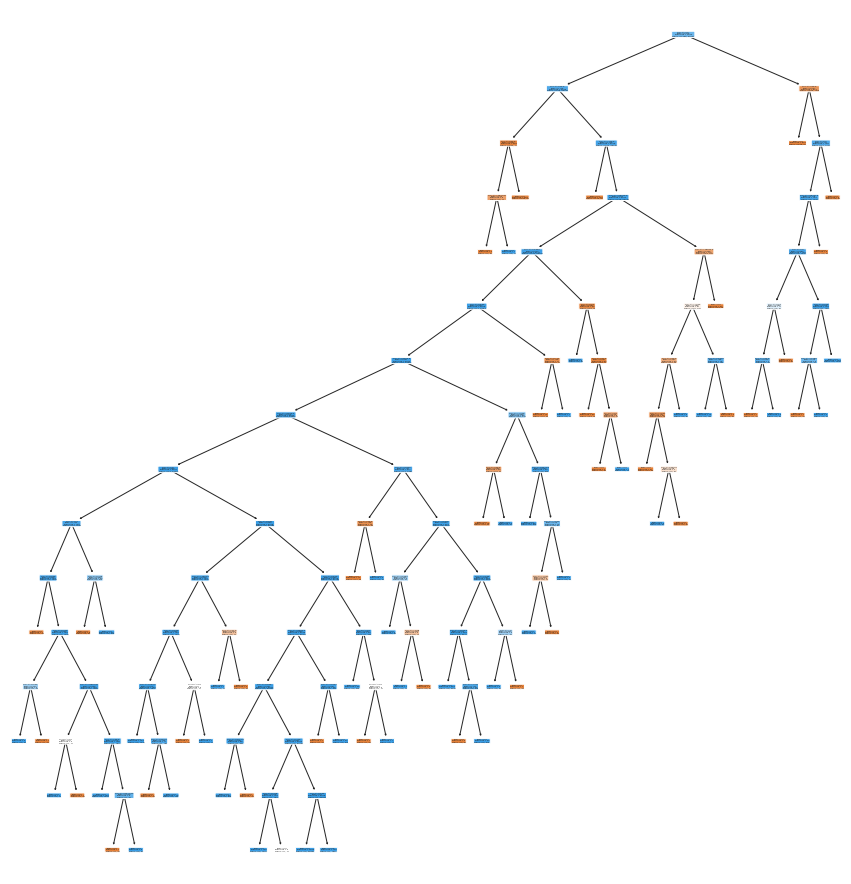

In [142]:
from sklearn import tree
plt.figure(figsize=(15,16)) 
tree.plot_tree(dtree, filled=True,  rounded=True)

In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       369
           1       1.00      1.00      1.00      1547

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



In [143]:
m2=confusion_matrix(y_test,predictions)
print(m2)

[[ 362    7]
 [   6 1541]]


In [144]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=40)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=10, random_state=40)

In [145]:
rfc_pred = rfc.predict(X_test)

In [146]:
rfc.score(X_train,y_train)

0.9900809188201514

In [147]:
rfc.score(X_test,y_test)

0.9859081419624217

In [148]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       369
           1       0.99      1.00      0.99      1547

    accuracy                           0.99      1916
   macro avg       0.99      0.97      0.98      1916
weighted avg       0.99      0.99      0.99      1916



In [149]:
m3=confusion_matrix(y_test,rfc_pred)
print(m3)

[[ 347   22]
 [   5 1542]]


In [151]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [154]:
model = XGBClassifier(use_label_encoder=False)
model.fit(X_train, y_train)

[19:35:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [153]:
y_prediction = model.predict(X_test)

In [155]:
model.score(X_train,y_train)

1.0

In [156]:
model.score(X_test,y_test)

0.9937369519832986

In [157]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       369
           1       1.00      1.00      1.00      1547

    accuracy                           0.99      1916
   macro avg       0.99      0.99      0.99      1916
weighted avg       0.99      0.99      0.99      1916



In [158]:
m4=confusion_matrix(y_test,y_prediction)
print(m4)

[[ 362    7]
 [   5 1542]]


In [159]:
from sklearn.ensemble import VotingClassifier

VR=VotingClassifier(estimators=[('1',logmodel),('2', dtree),('3', rfc),('4', model)])
VR.fit(X,y)

[19:37:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('1', LogisticRegression(max_iter=1000)),
                             ('2', DecisionTreeClassifier(max_depth=15)),
                             ('3',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=10,
                                                     random_state=40)),
                             ('4',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,

In [160]:
VR.score(X_train,y_train)

0.9997389715478987

In [161]:
VR.score(X_test,y_test)

1.0

In [162]:
y_prediction = VR.predict(X_test)
m5=confusion_matrix(y_test,y_prediction)
print(m5)

[[ 369    0]
 [   0 1547]]


In [163]:
print('Logistic regression:')
print(m1)
print('Decision tree:')
print(m2)
print('Random forest:')
print(m3)
print('XGBoost:')
print(m4)
print('Voting Regressor:')
print(m5)

Logistic regression:
[[ 231  138]
 [  47 1500]]
Decision tree:
[[ 362    7]
 [   6 1541]]
Random forest:
[[ 347   22]
 [   5 1542]]
XGBoost:
[[ 362    7]
 [   5 1542]]
Voting Regressor:
[[ 369    0]
 [   0 1547]]


### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [67]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [78]:
import requests
import io
s = requests.get(url).content
df_new = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [79]:
df_new

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³
...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³


In [87]:
df_new['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [94]:
start_date = min(df_new['date.utc'])
end_date = max(df_new['date.utc'])

print('start_date :', start_date, '\nend_date :', end_date)

start_date : 2019-05-07 01:00:00+00:00 
end_date : 2019-06-21 00:00:00+00:00


In [96]:
import datetime as dt

df_new['day'] = (pd.to_datetime(df_new['date.utc'])).dt.dayofweek
df1=df_new[df_new['city']=="Paris"].groupby('day')['value'].mean()
df2=df_new[df_new['city']=="London"].groupby('day')['value'].mean()
df3=df_new[df_new['city']=="Antwerpen"].groupby('day')['value'].mean()

data={"Paris": df1, "London":df2, "Antwerpen":df3}
table = pd.DataFrame(data)
table

,Paris,London,Antwerpen
day,,,
0,24.856250,23.969697,27.875000
1,30.999359,24.885714,22.214286
2,29.165753,23.460432,21.125000
3,28.600690,24.780142,27.500000
4,31.617986,26.446809,28.400000
5,25.266154,24.977612,33.500000
6,23.274306,24.859155,21.896552


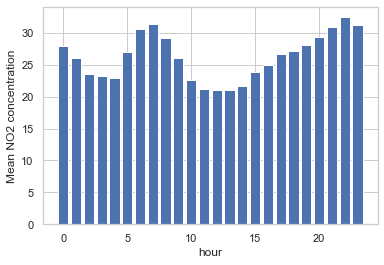

In [115]:
df_new['hour'] = (pd.to_datetime(df_new['date.utc'])).dt.hour
df1=df_new.groupby('hour')['value'].mean()

fig, ax = plt.subplots()
ax.bar(df1.index,df1)
ax.set_xlabel('hour')
ax.set_ylabel('Mean NO2 concentration')
plt.show()